In [1]:
#Thêm các thư viện
from bs4 import BeautifulSoup as bs
import requests

In [2]:
# Danh sách các url
urls = [f"http://quotes.toscrape.com/page/{i}/" for i in range(1,6)]

In [3]:
# 1.1

with open("kq.txt", "w", encoding="utf-8") as f: # Mở file với tên là kq.txt, ở chế độ ghi vào file và mã hóa UTF-8
  for url in urls: # Duyệt qua từng url trong danh sách các url
    page = requests.get(url) # Truy cập vào các trang web bằng requests
    soup = bs(page.content, 'lxml') # Lấy nội dung của các trang web là code HTML
    f.writelines(str(soup)) # Chuyển đổi code HTML thành kiểu string và ghi vào file

In [4]:
# 1.2
# a

for url in urls: # Duyệt qua từng url trong danh sách các url
  page = requests.get(url) # Truy cập vào các trang web bằng requests
  soup = bs(page.content, 'lxml') # Lấy nội dung của các trang web là code HTML
  result = [i for i in soup.find_all('div', {'class': 'quote'})] # Đọc tất cả các thẻ div với class là 'quote' và lưu nó vào biến result
  print(result) # In biến result ra màn hình

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>, <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K.

In [5]:
# b

for url in urls: # Duyệt qua từng url trong danh sách các url
  page = requests.get(url) # Truy cập vào các trang web bằng requests
  soup = bs(page.content, 'lxml') # Lấy nội dung của các trang web là code HTML
  result = soup.find_all('div', {'class': 'quote'}) # Đọc tất cả các thẻ div với class là 'quote' và lưu nó vào biến result
  for item in result: # Duyệt qua các phần tử trong biến result
    author = item.find('small', {'class': 'author'}).text # Đọc tất cả các thẻ có chứa nhãn 'small' với class là 'author' và lưu nó vào biến author
    print(author) # In biến authors ra màn hình

Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin
Marilyn Monroe
J.K. Rowling
Albert Einstein
Bob Marley
Dr. Seuss
Douglas Adams
Elie Wiesel
Friedrich Nietzsche
Mark Twain
Allen Saunders
Pablo Neruda
Ralph Waldo Emerson
Mother Teresa
Garrison Keillor
Jim Henson
Dr. Seuss
Albert Einstein
J.K. Rowling
Albert Einstein
Bob Marley
Dr. Seuss
J.K. Rowling
Bob Marley
Mother Teresa
J.K. Rowling
Charles M. Schulz
William Nicholson
Albert Einstein
Jorge Luis Borges
George Eliot
George R.R. Martin
C.S. Lewis
Marilyn Monroe
Marilyn Monroe
Albert Einstein
Marilyn Monroe
Marilyn Monroe
Martin Luther King Jr.
J.K. Rowling
James Baldwin


In [6]:
# c

import pandas as pd # Thêm thư viện
pd.set_option('display.max_colwidth', None) # Thiết lập độ rộng tối đa của các ký tự trong một cột là không giới hạn

df = pd.DataFrame() # Tạo một DataFrame để lưu các thông tin của tác giả

authors = [] # Tạo một list để lưu tên của tác giả
links = [] # Tạo một list để lưu đường link của tác giả
birthdays = [] # Tạo một list để lưu ngày, tháng và năm sinh tác giả
quotes = [] # Tạo một list để lưu câu nói nổi tiếng của tác giả

def tacgiaLink():
  for url in urls: # Duyệt qua từng url trong danh sách các url
    page = requests.get(url) # Truy cập vào các trang web bằng requests
    soup = bs(page.content, 'lxml') # Lấy nội dung của các trang web là code HTML
    authors.extend([i.text for i in soup.find_all(class_='author')]) # Lấy tên của tác giả và thêm vào list authors
    links.extend(["https://quotes.toscrape.com" + a['href'] for div in soup.find_all('div', {'class': 'quote'}) for span in div.find_all('span') for a in span.find_all('a')]) # Lấy đường link của tác giả và thêm vào list links
    quotes.extend([i.text.strip('“,”') for i in soup.find_all(class_='text')]) # Lấy câu nói nổi tiếng của tác giả và thêm vào list quotes và xóa dấu ngoặc kép tron

  for link in links: # Duyệt qua từng đường link trong danh sách các đường link của tác giả
    page = requests.get(link) # Truy cập vào các đường link bằng requests
    soup = bs(page.content, 'lxml') # Lấy nội dung của các trang web là code HTML
    birthdays.extend([i.text for i in soup.find_all(class_='author-born-date')]) # Lấy ngày, tháng và năm sinh của tác giả và lưu và list birthdays

tacgiaLink() # Gọi lại hàm tacgiaLink()

df['Tacgia'] = authors # Lưu tên của tác giả vào cột 'Tacgia' của DataFrame
df['Link'] = pd.Series(links) # Lưu đường link của tác giả vào cột 'Link' của DataFrame
df['Namsinh'] = birthdays # Lưu ngày, tháng và năm sinh tác giả vào cột 'Namsinh' của DataFrame
df['Quote'] = quotes # Lưu câu nói nổi tiếng của tác giả vào cột 'Quote' của DataFrame

df # In ra màn hình DataFrame đã lưu các thông tin của tác giả

,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,https://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.
1,J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965","It is our choices, Harry, that show what we truly are, far more than our abilities."
2,Albert Einstein,https://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.
3,Jane Austen,https://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775","The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid."
4,Marilyn Monroe,https://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926","Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring."
5,Albert Einstein,https://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",Try not to become a man of success. Rather become a man of value.
6,André Gide,https://quotes.toscrape.com/author/Andre-Gide,"November 22, 1869",It is better to be hated for what you are than to be loved for what you are not.
7,Thomas A. Edison,https://quotes.toscrape.com/author/Thomas-A-Edison,"February 11, 1847","I have not failed. I've just found 10,000 ways that won't work."
8,Eleanor Roosevelt,https://quotes.toscrape.com/author/Eleanor-Roosevelt,"October 11, 1884",A woman is like a tea bag; you never know how strong it is until it's in hot water.
9,Steve Martin,https://quotes.toscrape.com/author/Steve-Martin,"August 14, 1945","A day without sunshine is like, you know, night."


In [7]:
#d

df.to_csv('Quote.csv', index=False, encoding='utf-8') # Lưu DataFrame bao gồm các thông tin của tác giả vào file Quote.csv

In [8]:
# 2.1
# Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền? --> Giá trị dữ liệu Trường ngày sinh đủ, không bị thiếu.

df['Namsinh'].isnull().sum() # Kiểm tra giá trị của dữ liệu Trường ngày sinh có bị thiếu hay không?

0

In [9]:
# Bạn hãy thêm vào Trường Tuoi (Tuổi) và đề xuất cách điền tuổi của các tác giả?

from datetime import datetime # Thêm thư viện

df['Tuoi'] = datetime.now().year - pd.DatetimeIndex(df['Namsinh']).year # Thêm cột 'Tuoi' bằng cách lấy năm hiện tại trừ cho năm sinh của tác giả

df # In ra màn hình DataFrame đã lưu các thông tin của tác giả

,Tacgia,Link,Namsinh,Quote,Tuoi
0,Albert Einstein,https://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.,143
1,J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965","It is our choices, Harry, that show what we truly are, far more than our abilities.",57
2,Albert Einstein,https://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.,143
3,Jane Austen,https://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775","The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.",247
4,Marilyn Monroe,https://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926","Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.",96
5,Albert Einstein,https://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",Try not to become a man of success. Rather become a man of value.,143
6,André Gide,https://quotes.toscrape.com/author/Andre-Gide,"November 22, 1869",It is better to be hated for what you are than to be loved for what you are not.,153
7,Thomas A. Edison,https://quotes.toscrape.com/author/Thomas-A-Edison,"February 11, 1847","I have not failed. I've just found 10,000 ways that won't work.",175
8,Eleanor Roosevelt,https://quotes.toscrape.com/author/Eleanor-Roosevelt,"October 11, 1884",A woman is like a tea bag; you never know how strong it is until it's in hot water.,138
9,Steve Martin,https://quotes.toscrape.com/author/Steve-Martin,"August 14, 1945","A day without sunshine is like, you know, night.",77


In [10]:
# 2.2 
# Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu

df.sort_values(by=['Tacgia'])

,Tacgia,Link,Namsinh,Quote,Tuoi
0,Albert Einstein,https://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.,143
28,Albert Einstein,https://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",Logic will get you from A to Z; imagination will get you everywhere.,143
2,Albert Einstein,https://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.,143
44,Albert Einstein,https://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879","Life is like riding a bicycle. To keep your balance, you must keep moving.",143
5,Albert Einstein,https://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",Try not to become a man of success. Rather become a man of value.,143
26,Albert Einstein,https://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879","If you want your children to be intelligent, read them fairy tales. If you want them to be more intelligent, read them more fairy tales.",143
37,Albert Einstein,https://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",Any fool can know. The point is to understand.,143
12,Albert Einstein,https://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879","If you can't explain it to a six year old, you don't understand it yourself.",143
19,Allen Saunders,https://quotes.toscrape.com/author/Allen-Saunders,"April 24, 1899",Life is what happens to us while we are making other plans.,123
6,André Gide,https://quotes.toscrape.com/author/Andre-Gide,"November 22, 1869",It is better to be hated for what you are than to be loved for what you are not.,153


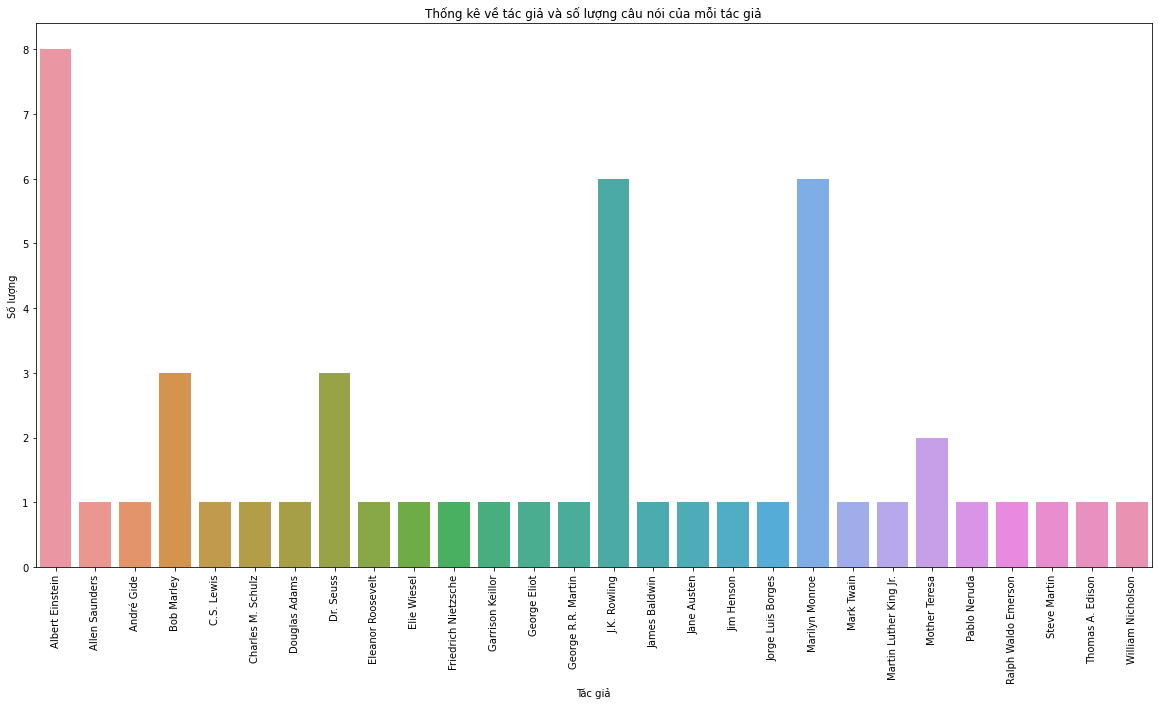

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thống kê về tác giả và số lượng câu nói của mỗi tác giả

author_number_of_quote = df.groupby('Tacgia')['Quote'].count().reset_index() # Lưu lại tên các tác giả và số lượng câu nói của mỗi tác giả

plt.figure(figsize = (20, 10)) # Kích thước của biểu đồ cột
sns.barplot(x = 'Tacgia', y = 'Quote', data = author_number_of_quote) # Đổ dữ liệu vào biểu đồ cột
plt.xticks(rotation = 90) # Xoay nội dung của trục hoành x một góc 90
plt.xlabel('Tác giả') # Tên của trục hoành
plt.ylabel('Số lượng') # Tên của trục tung
plt.title('Thống kê về tác giả và số lượng câu nói của mỗi tác giả') # Tiêu đề của biểu đồ cột
plt.show() # In ra màn hình biểu đồ cột

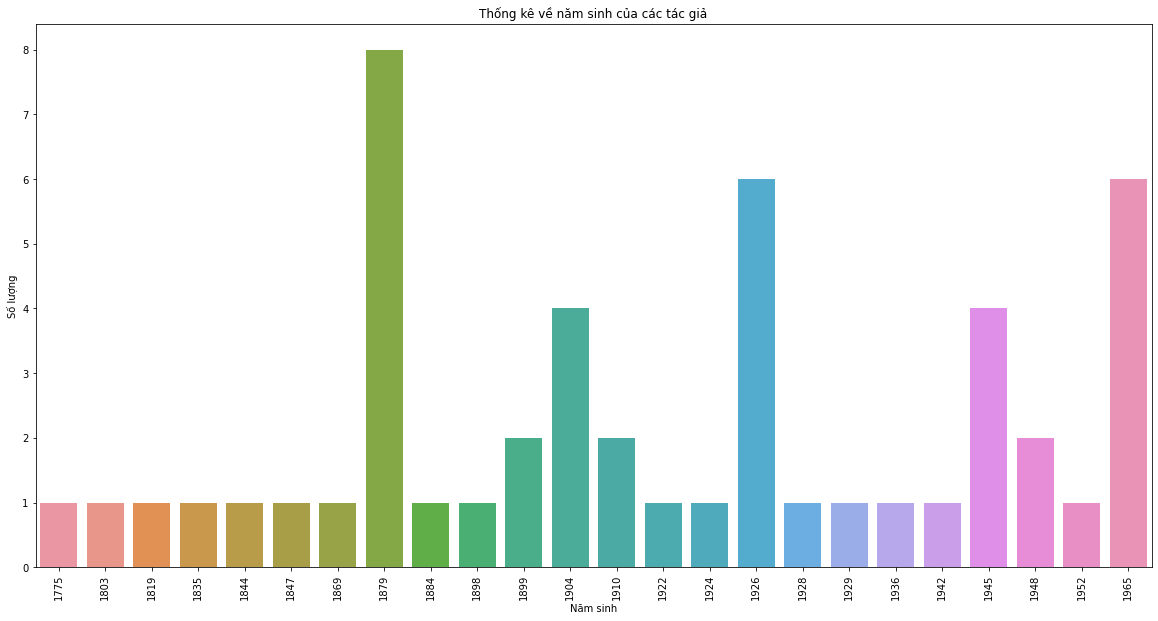

In [12]:
# Thống kê về năm sinh của các tác giả

df['new_Namsinh'] = pd.DatetimeIndex(df['Namsinh']).year # Lấy năm sinh của tác giả

bithday_author = df.groupby(['new_Namsinh'])['Namsinh'].count().reset_index() # Lưu lại năm sinh của các tác giả và số lượng năm sinh

bithday_author.columns = ['Year of Birth', 'Frequency'] # Tạo cột cho DataFrame

plt.figure(figsize = (20, 10)) # Kích thước của biểu đồ cột
sns.barplot(x = 'Year of Birth', y = 'Frequency', data = bithday_author) # Đổ dữ liệu vào biểu đồ cột
plt.xticks(rotation = 90) # Xoay nội dung của trục hoành x một góc 90
plt.xlabel('Năm sinh') # Tên của trục hoành
plt.ylabel('Số lượng') # Tên của trục tung
plt.title('Thống kê về năm sinh của các tác giả') # Tiêu đề của biểu đồ cột
plt.show() # In ra màn hình biểu đồ cột

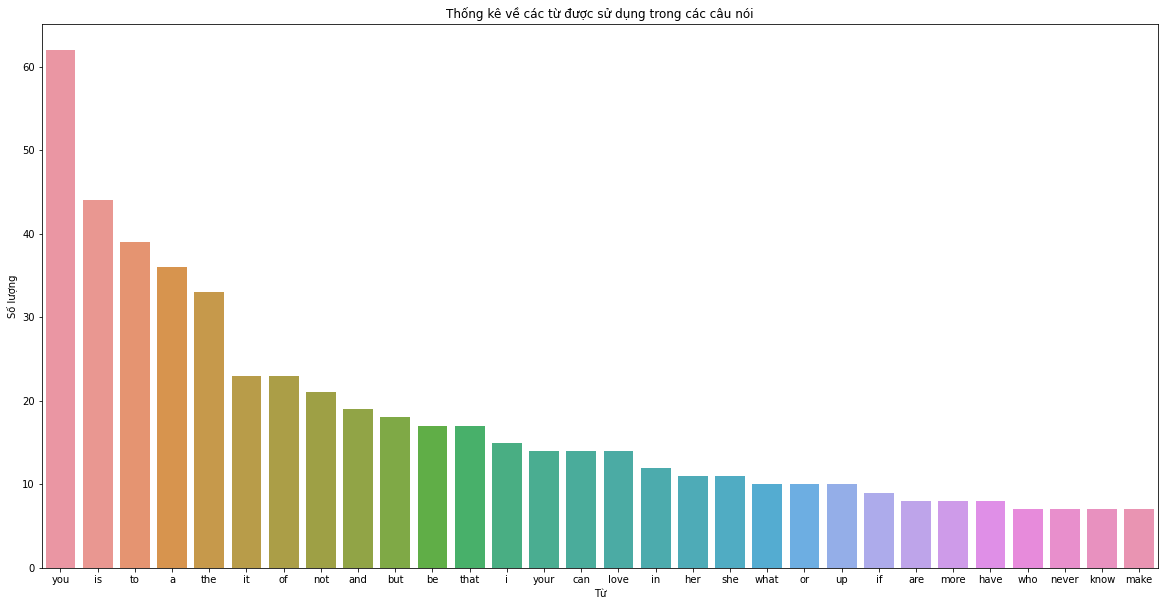

In [13]:
# Thống kê về các từ được sử dụng trong các câu nói

import numpy as np

df['temp'] = df['Quote'].str.lower().str.replace('[^\w\s]','', regex=True) # Viết thường và xóa các ký tự đặc biệt trong câu nói

word_and_frequency = df.temp.str.split(expand=True).stack().value_counts().reset_index() # Đếm số từ sử dụng trong các câu nói
 
word_and_frequency.columns = ['Word', 'Frequency'] # Tạo cột cho DataFrame

plt.figure(figsize = (20, 10)) # Kích thước của biểu đồ cột
sns.barplot(x = 'Word', y = 'Frequency', data = word_and_frequency.head(30)) # Đổ dữ liệu vào biểu đồ cột
plt.xlabel('Từ') # Tên của trục hoành
plt.ylabel('Số lượng') # Tên của trục tung
plt.title('Thống kê về các từ được sử dụng trong các câu nói') # Tiêu đề của biểu đồ cột
plt.show() # In ra màn hình biểu đồ cột


In [14]:
# Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ, ...
max_quote = df['Quote'].max() # Tìm câu nói dài nhất
word_max_quote = len(max_quote.split(' ')) # Chia câu nói dài nhất theo khoảng trắng thành các từ sau đó đếm các từ đó
print('Câu nói dài nhất: ', max_quote) # In ra màn hình nội dung câu nói dài nhất
print('Số từ trong câu nói dài nhất: ', word_max_quote) # In ra màn hình số từ của câu nói dài nhất

print()

min_quote = df['Quote'].min() # Tìm câu nói ngắn nhất  
word_min_quote = len(min_quote.split(' ')) # Chia câu nói ngắn nhất theo khoảng trắng thành các từ sau đó đếm các từ đó
print('Câu nói ngắn nhất: ', min_quote) # In ra màn hình nội dung câu nói ngắn nhất
print('Số từ trong câu nói ngắn nhất: ', word_min_quote) # In ra màn hình số từ của câu nói ngắn nhất

Câu nói dài nhất:  You may not be her first, her last, or her only. She loved before she may love again. But if she loves you now, what else matters? She's not perfect—you aren't either, and the two of you may never be perfect together but if she can make you laugh, cause you to think twice, and admit to being human and making mistakes, hold onto her and give her the most you can. She may not be thinking about you every second of the day, but she will give you a part of her that she knows you can break—her heart. So don't hurt her, don't change her, don't analyze and don't expect more than she can give. Smile when she makes you happy, let her know when she makes you mad, and miss her when she's not there.
Số từ trong câu nói dài nhất:  138

Câu nói ngắn nhất:  A day without sunshine is like, you know, night.
Số từ trong câu nói ngắn nhất:  9


In [15]:
# 2.3

df = pd.read_csv("Quote.csv")

df = df.drop('Link', axis=1)
df = df.drop('Namsinh', axis=1)

df


,Tacgia,Quote
0,Albert Einstein,The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.
1,J.K. Rowling,"It is our choices, Harry, that show what we truly are, far more than our abilities."
2,Albert Einstein,There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.
3,Jane Austen,"The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid."
4,Marilyn Monroe,"Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring."
5,Albert Einstein,Try not to become a man of success. Rather become a man of value.
6,André Gide,It is better to be hated for what you are than to be loved for what you are not.
7,Thomas A. Edison,"I have not failed. I've just found 10,000 ways that won't work."
8,Eleanor Roosevelt,A woman is like a tea bag; you never know how strong it is until it's in hot water.
9,Steve Martin,"A day without sunshine is like, you know, night."
